In [1]:
%matplotlib inline

D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/model/lstm_rgr.ipynb)


[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/model/lstm_rgr.ipynb)

In [ ]:
try:
    import ai4water
except (ImportError, ModuleNotFoundError):
    !pip install ai4water[tf2]

# LSTM for time series forecasting


In [2]:

from ai4water import Model
from ai4water.datasets import MtropicsLaos
from ai4water.utils.utils import get_version_info


D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:

for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.2
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [4]:
dataset = MtropicsLaos(save_as_nc=True,  # if set to True, then netcdf must be installed
                       convert_to_csv=False,
                       path="F:\\data\\MtropicsLaos",
                      )

lookback = 20

data = dataset.make_regression(lookback_steps=lookback)
data.shape


    Not downloading the data since the directory 
    F:\data\MtropicsLaos already exists.
    Use overwrite=True to remove previously saved files and download again


Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


(4071, 9)

In [5]:
inputs = data.columns.tolist()[0:-1]
inputs

['air_temp',
 'rel_hum',
 'wind_speed',
 'sol_rad',
 'water_level',
 'pcp',
 'susp_pm',
 'Ecoli_source']

In [6]:


layers ={
    "Input": {'config': {'shape': (lookback, len(inputs))}},
    "LSTM": {'config': {'units': 14, 'activation': "elu"}},
    "Dense": 1
}
model = Model(
    input_features=inputs,
    output_features=data.columns.tolist()[-1:],
    model={'layers':layers},
    ts_args={"lookback": lookback},
    lr=0.009919,
    batch_size=8,
    split_random=True,
    train_fraction=1.0,
    x_transformation="zscore",
    y_transformation={"method": "log", "replace_zeros": True, "treat_negatives": True},
    epochs=200
)


            building DL model for  
            regression problem using Model
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 20, 8)]           0         
                                                                 
 LSTM (LSTM)                 (None, 14)                1288      
                                                                 
 Dense (Dense)               (None, 1)                 15        
                                                                 
Total params: 1,303
Trainable params: 1,303
Non-trainable params: 0
_________________________________________________________________



********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (206, 20, 8)
target shape:  (206, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (52, 20, 8)
target shape:  (52, 1)
Epoch 1/200
assigning name Input to IteratorGetNext:0 with shape (None, 20, 8)
assigning name Input to IteratorGetNext:0 with shape (None, 20, 8)
26/26 [==============================] - 2s 11ms/step - loss: 78.0383 - val_loss: 26.9827
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 25.4774 - val_loss: 18.8905
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 14.9665 - val_loss: 8.7782
Epoch 4/200
26/26 [==============================] - 0s 5ms/step - loss: 7.0218 - val_loss: 3.4659
Epoch 5/200
26/26 [==============================] - 0s 5ms/step - loss: 3.7423 - val_loss: 1.9051
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 3.4310 - val_loss: 1

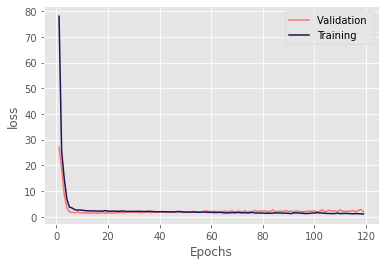

********** Successfully loaded weights from weights_019_1.33551.hdf5 file **********


In [7]:
h = model.fit(data=data)


In [8]:

type(h)

keras.callbacks.History

***** Test *****
input_x shape:  (0,)
target shape:  (0,)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (52, 20, 8)
target shape:  (52, 1)
assigning name Input to IteratorGetNext:0 with shape (None, 20, 8)


No test data found. using validation data instead


2/2 [==============================] - 0s 2ms/step


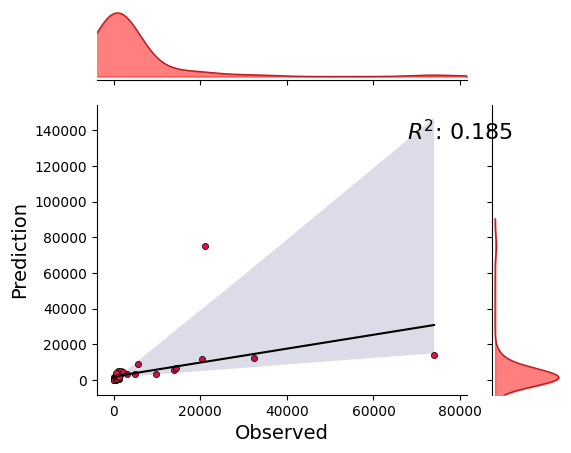

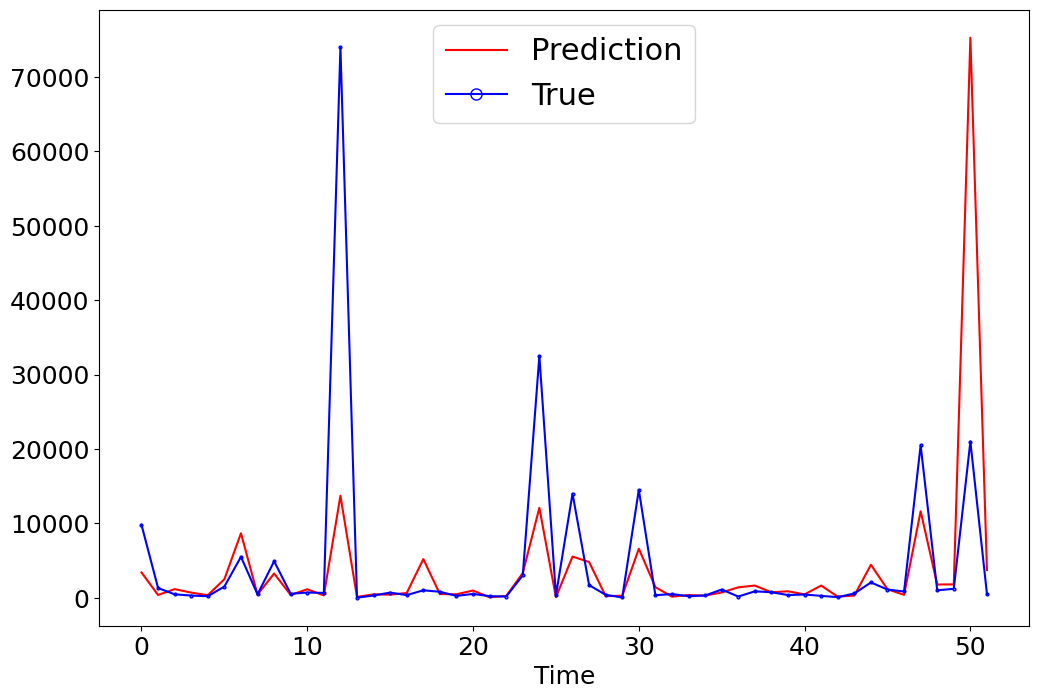

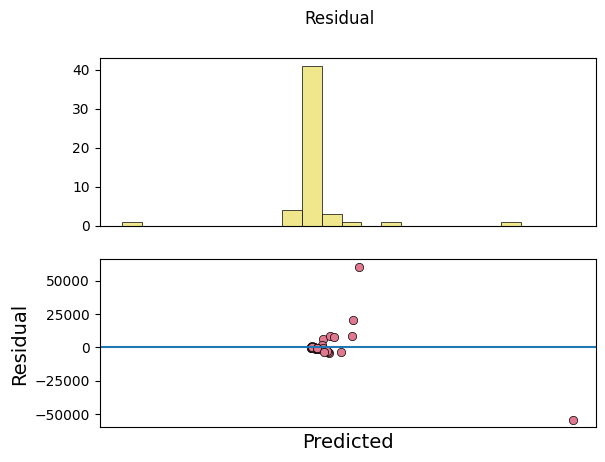

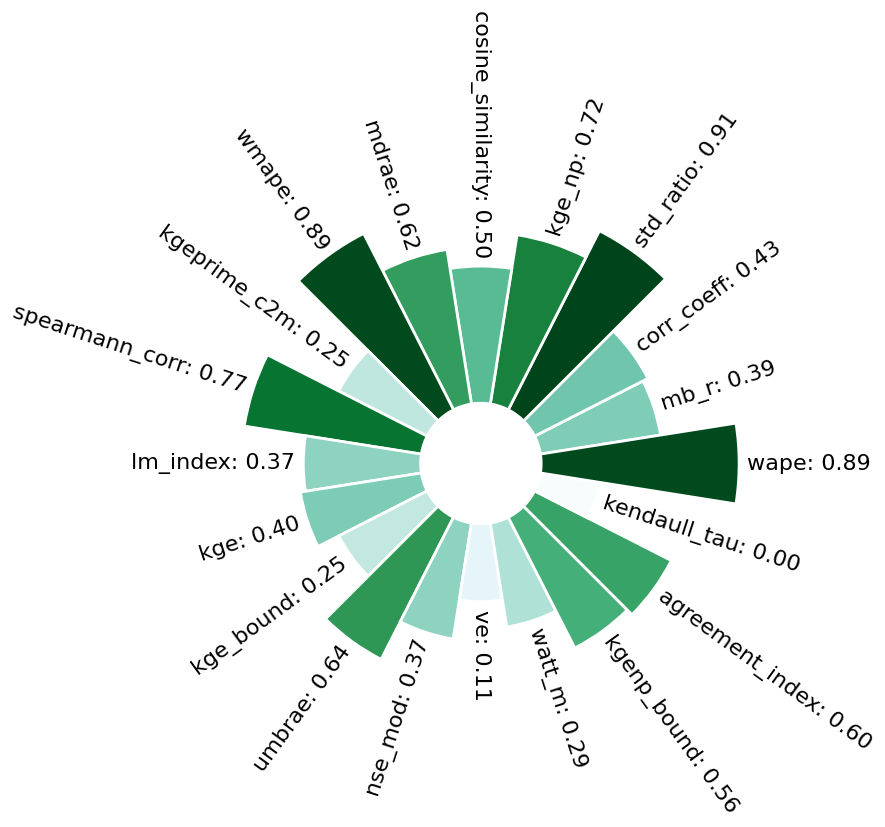

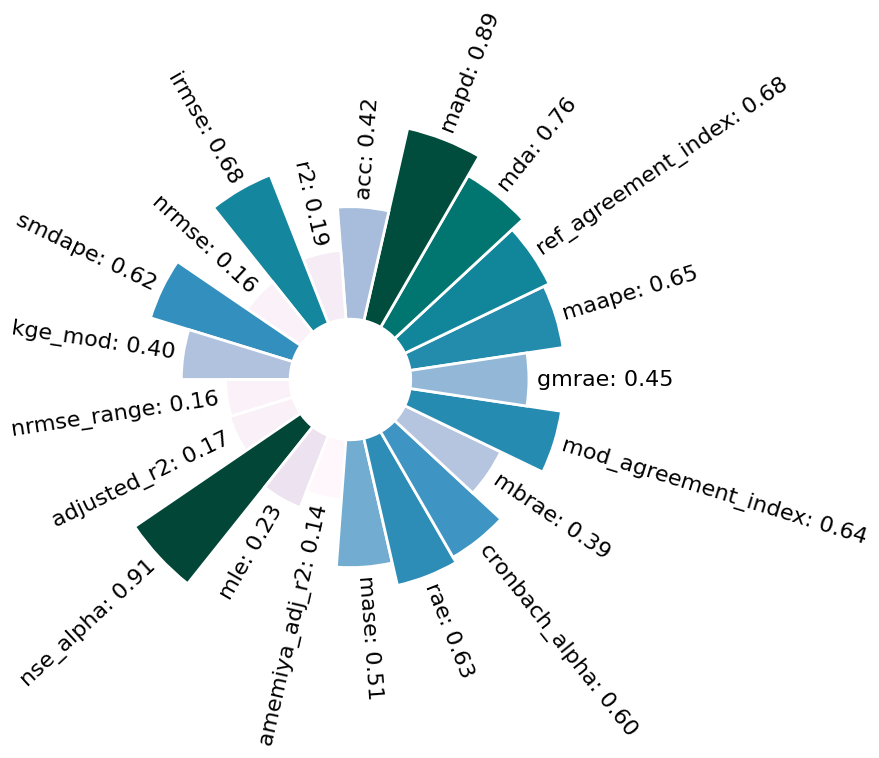

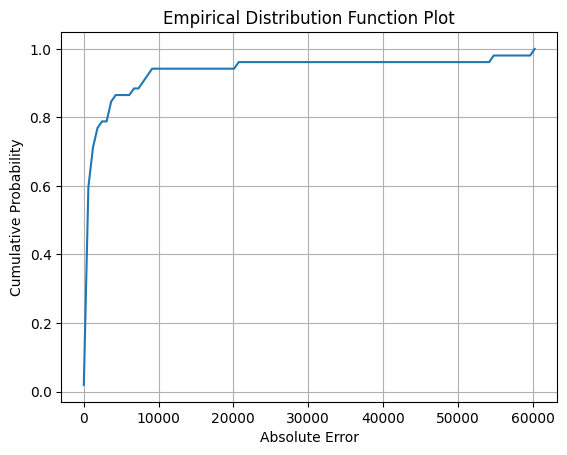

In [9]:
p = model.predict(data=data)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (206, 20, 8)
target shape:  (206, 1)
7/7 [==============================] - 0s 1ms/step


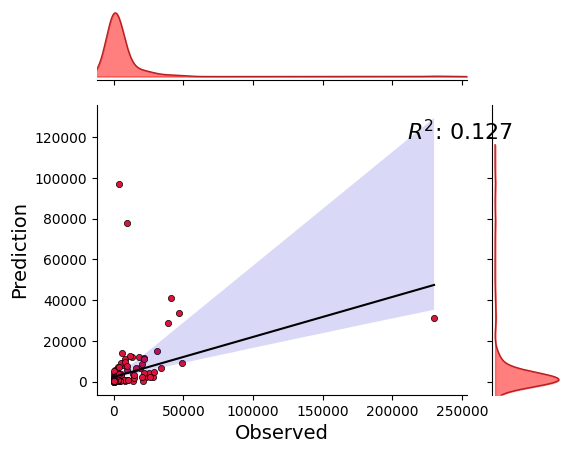

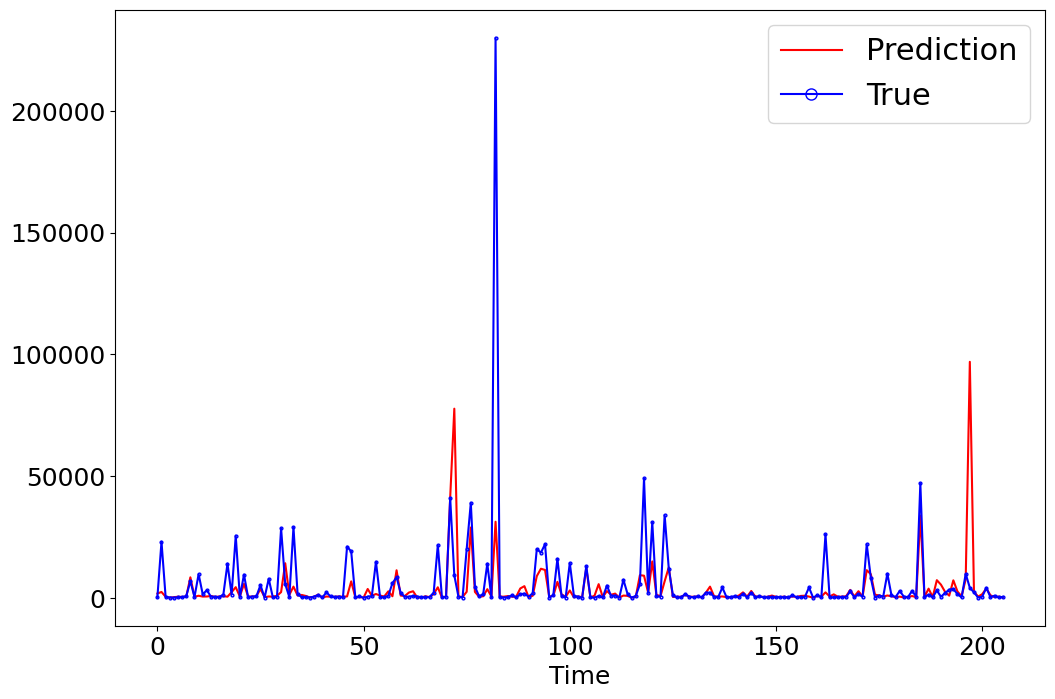

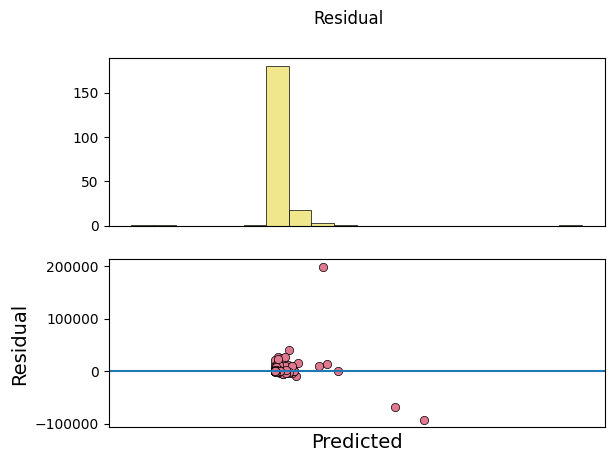

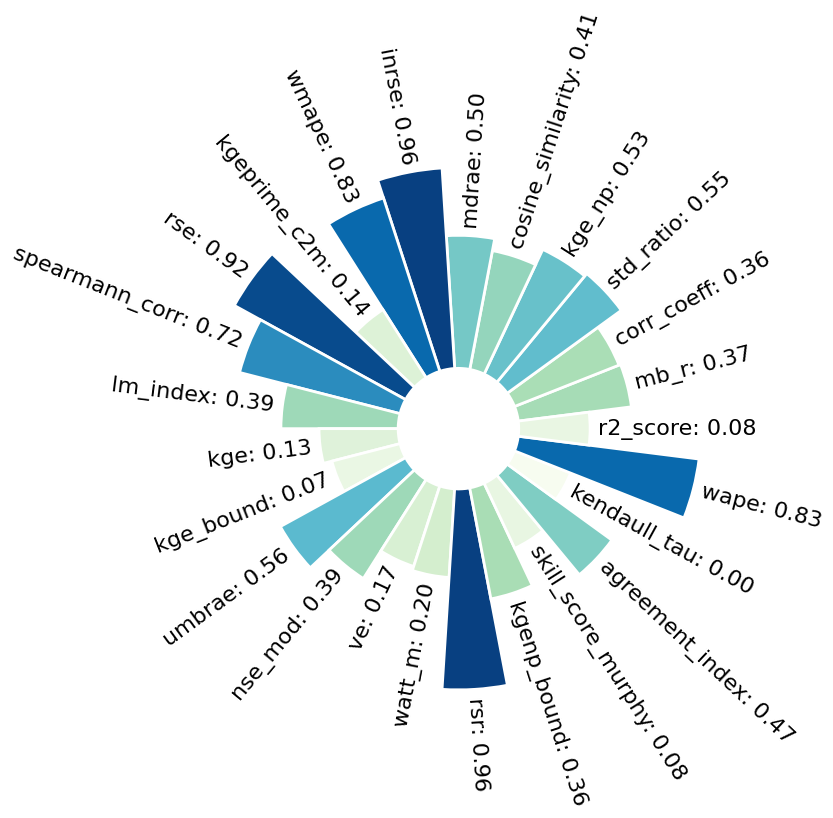

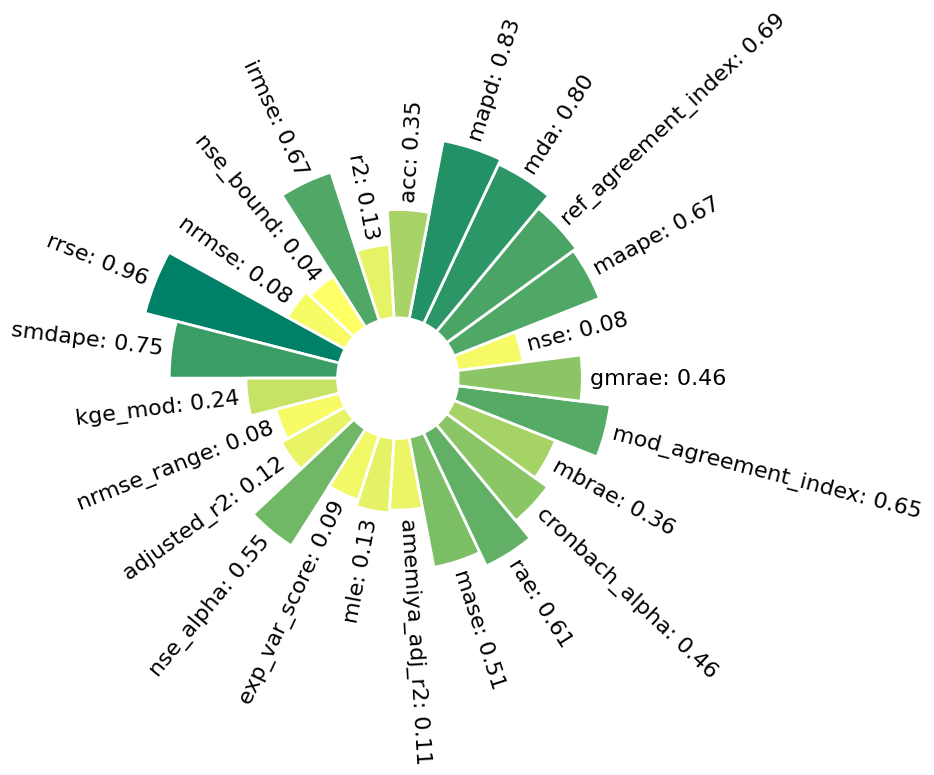

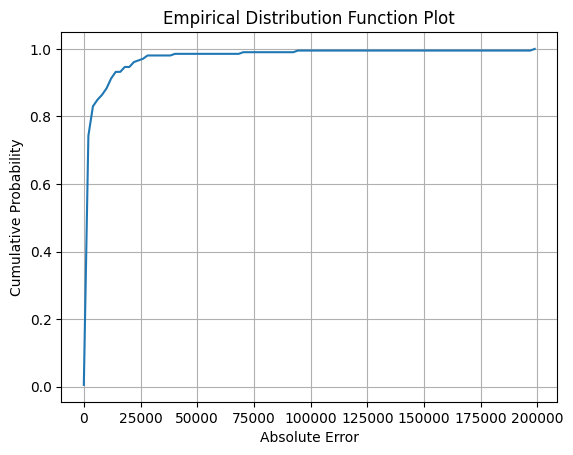

In [10]:
p = model.predict_on_training_data(data=data)

In [13]:
train_x, train_y = model.training_data(data=data)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (206, 20, 8)
target shape:  (206, 1)


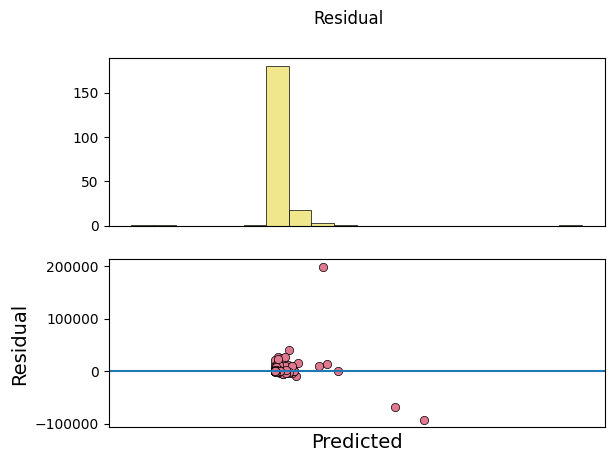

In [15]:
p = model.predict(x=train_x, y=train_y, plots=['residual'],  verbose=0)

In [12]:
t, p = model.predict_on_all_data(data=data, return_true=True, process_results=False)
t.shape, p.shape


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (206, 20, 8)
target shape:  (206, 1)

********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (52, 20, 8)
target shape:  (52, 1)
***** Test *****
input_x shape:  (0,)
target shape:  (0,)
9/9 [==============================] - 0s 1ms/step


((258, 1), (258, 1))